<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/trabajo_de_presentacion_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas:
   age     sex     bmi  children  smoker     region   charges
0   19  female  27.900         0       1  southwest  16884.92
1   18    male  33.770         1       0  southeast   1725.55
2   28    male  33.000         3       0  southeast   4449.46
3   33    male  22.705         0       0  northwest  21984.47
4   32    male  28.880         0       0  northwest   3866.86

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB
None

Estadísticos descriptivos:
               age          bmi  

<Figure size 1000x600 with 0 Axes>

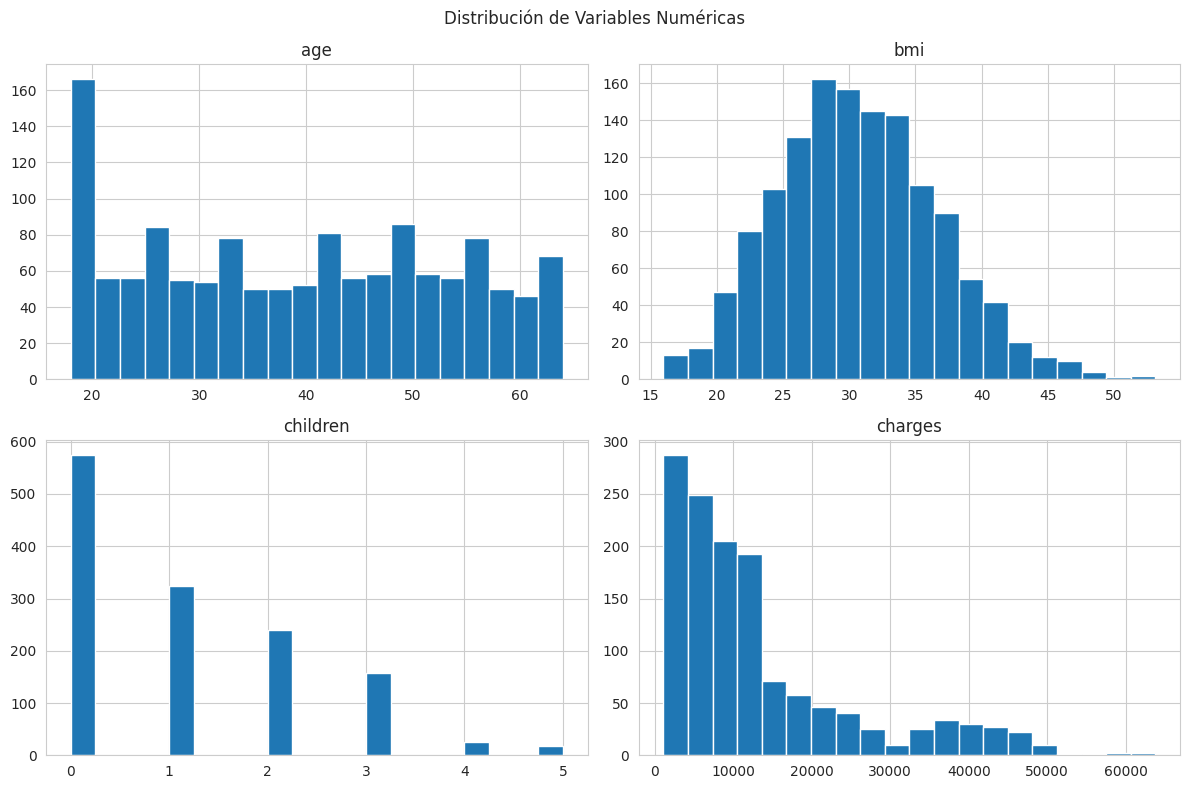

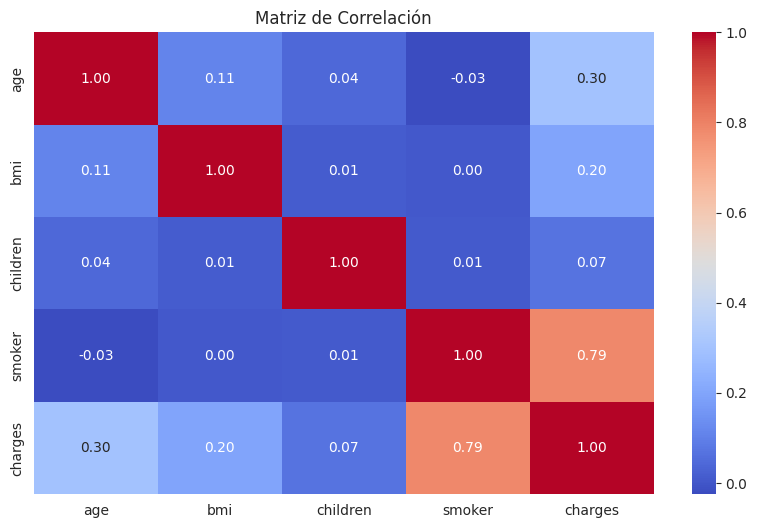

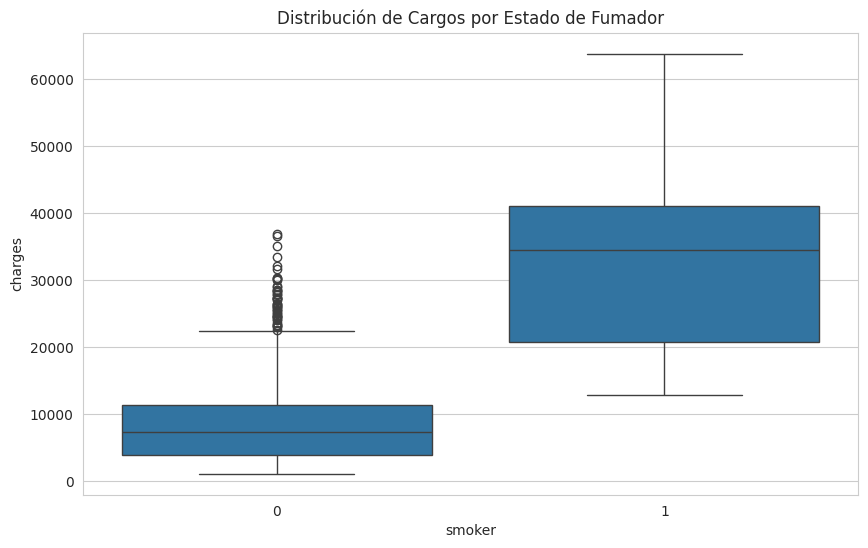

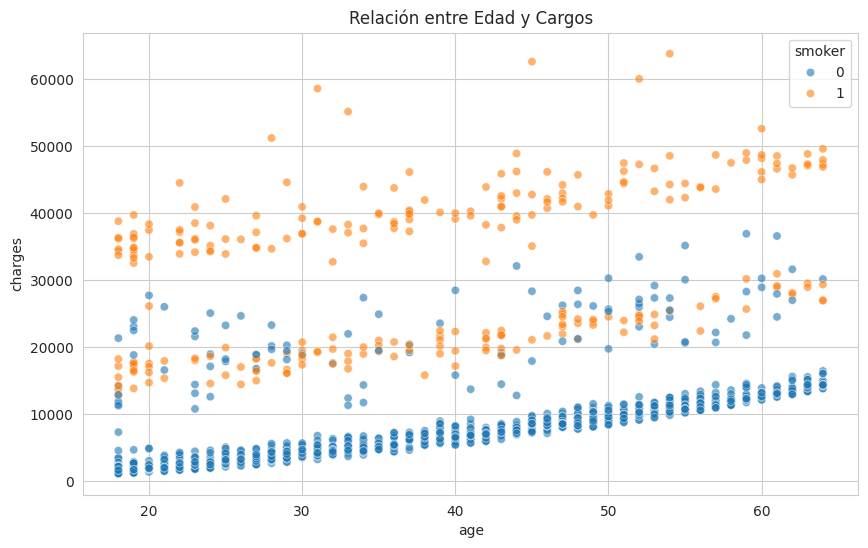

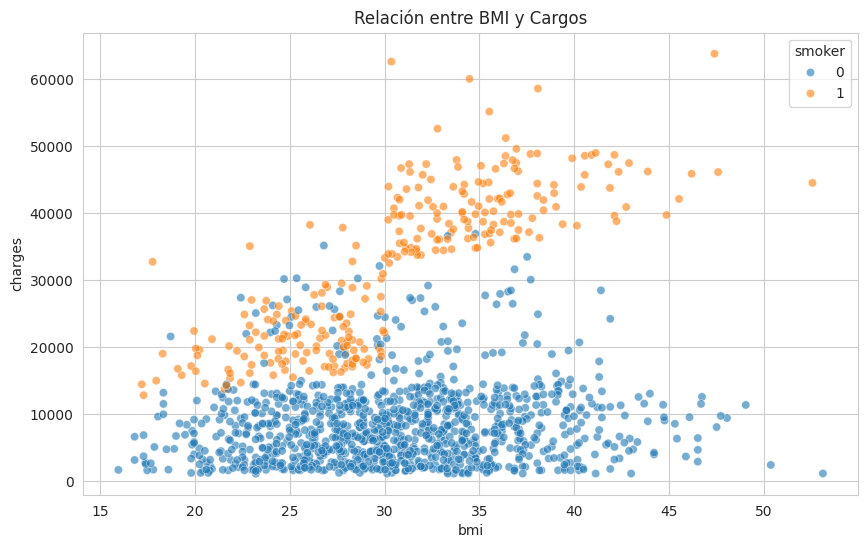

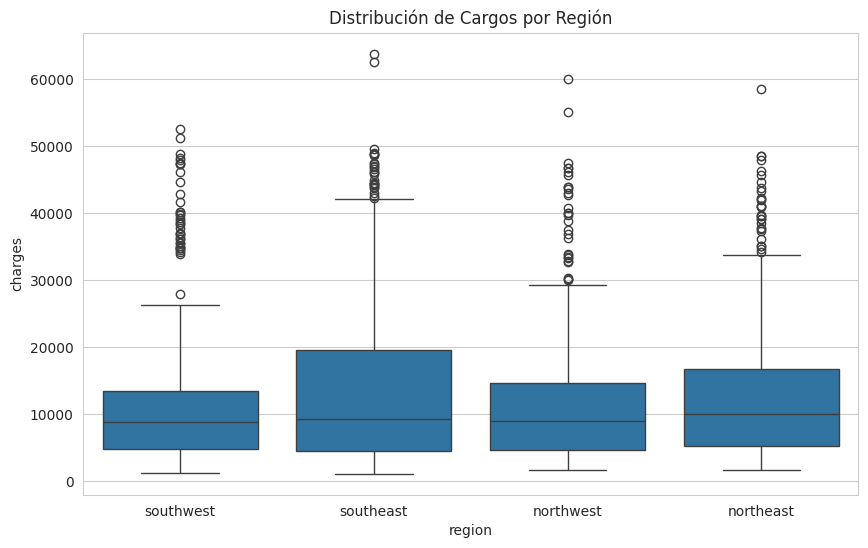

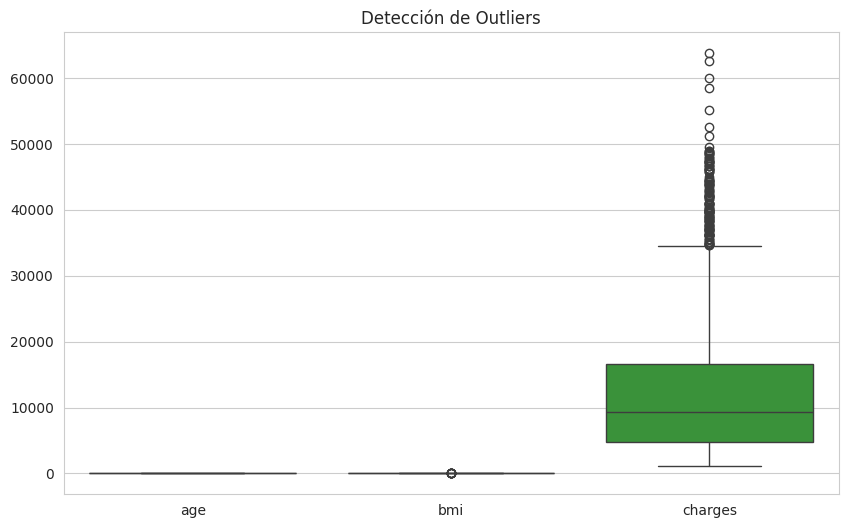

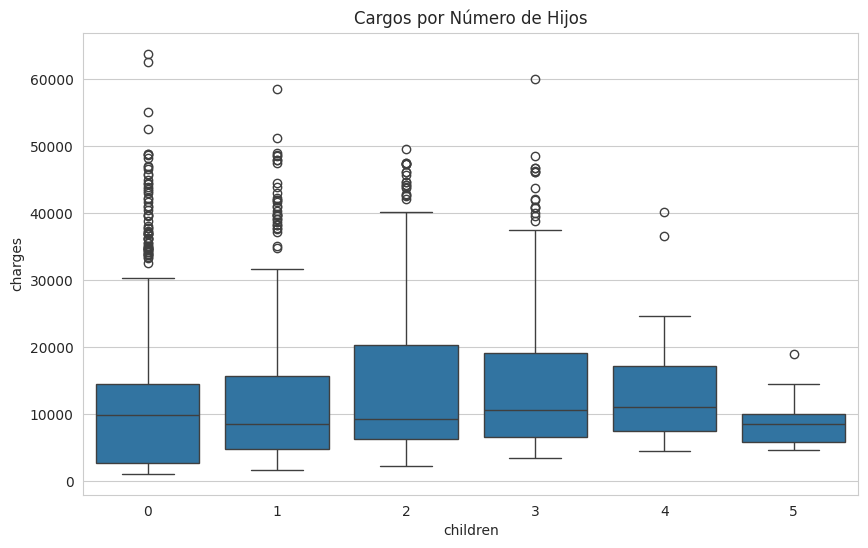

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

# Leer los datos desde el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final assesment/insurance.csv',
                 thousands=',',       # Convertir comas en números
                 dtype={'charges': float})  # Asegurar tipo numérico

# 1. Vista inicial de los datos
print("Primeras filas:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticos descriptivos:")
print(df.describe())

# 2. Análisis de variables categóricas
categorical = ['sex', 'smoker', 'region']
print("\nDistribución de variables categóricas:")
for col in categorical:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))

# 3. Análisis de variables numéricas
numerical = ['age', 'bmi', 'children', 'charges']

# Histogramas
df[numerical].hist(bins=20, figsize=(12,8))
plt.suptitle('Distribución de Variables Numéricas')
plt.tight_layout()
plt.show()

# 4. Relación entre variables
# Matriz de correlación
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# 5. Relación entre cargos y variables clave
# Cargos vs Smoker
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Distribución de Cargos por Estado de Fumador')
plt.show()

# Cargos vs Edad
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Relación entre Edad y Cargos')
plt.show()

# Cargos vs BMI
plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Relación entre BMI y Cargos')
plt.show()

# 6. Distribución por región
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Distribución de Cargos por Región')
plt.show()

# 7. Análisis de outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['age', 'bmi', 'charges']])
plt.title('Detección de Outliers')
plt.show()

# 8. Relación entre hijos y cargos
plt.figure(figsize=(10,6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Cargos por Número de Hijos')
plt.show()

In [ ]:
print(df.head())
print(df.info())
df.describe()

   age     sex     bmi  children  smoker     region   charges
0   19  female  27.900         0       1  southwest  16884.92
1   18    male  33.770         1       0  southeast   1725.55
2   28    male  33.000         3       0  southeast   4449.46
3   33    male  22.705         0       0  northwest  21984.47
4   32    male  28.880         0       0  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB
None


,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422414
std,14.049960,6.098187,1.205493,0.403694,12110.011240
min,18.000000,15.960000,0.000000,0.000000,1121.870000
25%,27.000000,26.296250,0.000000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,0.000000,9382.030000
75%,51.000000,34.693750,2.000000,0.000000,16639.915000
max,64.000000,53.130000,5.000000,1.000000,63770.430000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # 1. Cargar y preparar los datos
# df = pd.read_csv('insurance.csv',
#                  thousands=',',
#                  dtype={'charges': float})

# 2. Preprocesamiento de variables categóricas
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 3. Definir variables independientes (X) y dependiente (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 5. Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Hacer predicciones
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# 8. Mostrar coeficientes
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
}).sort_values('Coeficiente', ascending=False)

print("\nCoeficientes del modelo:")
print(coefficients)

# 9. Interpretación adicional
print(f"\nIntercepto: {model.intercept_:.2f}")

MSE: 33596917.56
RMSE: 5796.28
R²: 0.7836

Coeficientes del modelo:
           Variable   Coeficiente
4          smoker_1  23651.128730
2          children    425.278760
1               bmi    337.092585
0               age    256.975707
3          sex_male    -18.591465
5  region_northwest   -370.677689
6  region_southeast   -657.864469
7  region_southwest   -809.798992

Intercepto: -11931.22


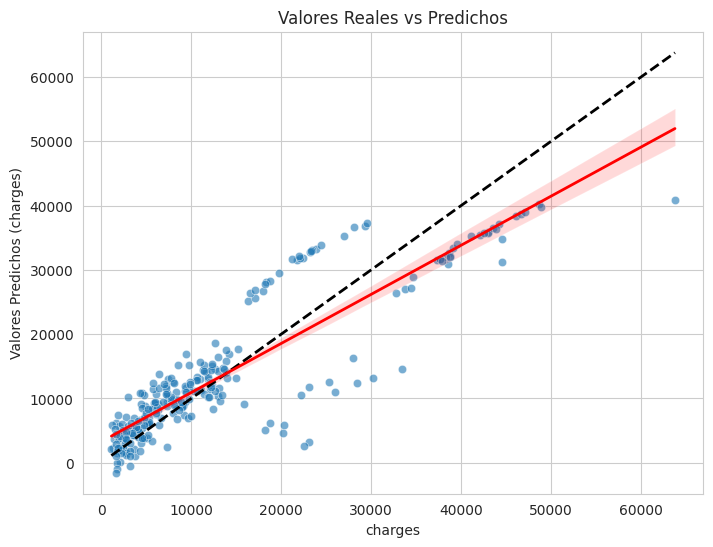

In [ ]:
# Predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de referencia perfecta
plt.xlabel("Valores Reales (charges)")
plt.ylabel("Valores Predichos (charges)")
plt.title("Valores Reales vs Predichos")
plt.grid(True)

# Línea de regresión entre reales y predichos
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'lw': 2})
plt.show()

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_1,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92,False,True,False,False,True
1,18,33.770,1,1725.55,True,False,False,True,False
2,28,33.000,3,4449.46,True,False,False,True,False
3,33,22.705,0,21984.47,True,False,True,False,False
4,32,28.880,0,3866.86,True,False,True,False,False


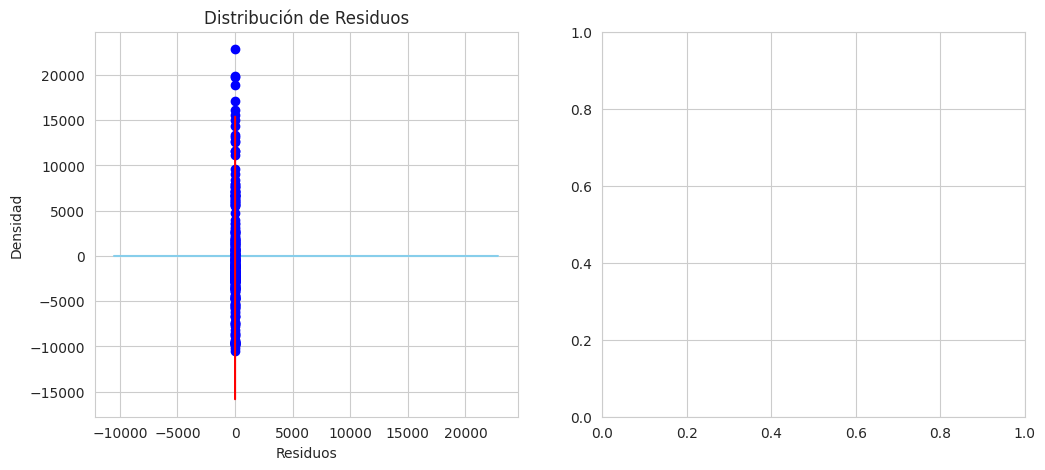

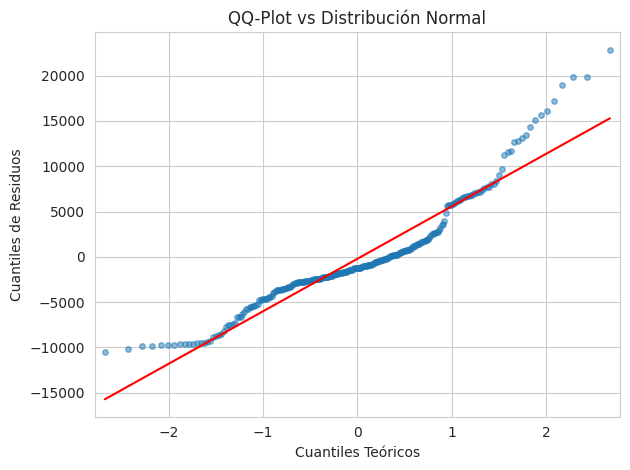

--- Pruebas de Normalidad ---
Shapiro-Wilk: Estadístico = 0.9139, p-valor = 0.0000
Jarque-Bera: Estadístico = 104.18, p-valor = 0.0000

--- Interpretación ---
Los residuos NO siguen una distribución normal
(p-valor < 0.05 indica no normalidad)

--- Métricas del Modelo ---
MSE: 33596917.56
R²: 0.7836


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot



#  Dividir datos
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

#  Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Calcular residuos del conjunto de prueba
y_pred = model.predict(X_test)
residuos = y_test - y_pred

#  Gráficos de diagnóstico de normalidad
plt.figure(figsize=(12, 5))

# Histograma + KDE
plt.subplot(1, 2, 1)
sns.histplot(residuos, kde=True, stat='density', color='skyblue')
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Distribución de Residuos', fontsize=12)
plt.xlabel('Residuos', fontsize=10)
plt.ylabel('Densidad', fontsize=10)

# QQ-Plot
plt.subplot(1, 2, 2)
qqplot(residuos, line='s', marker='o', markersize=4, alpha=0.5)
plt.title('QQ-Plot vs Distribución Normal', fontsize=12)
plt.xlabel('Cuantiles Teóricos', fontsize=10)
plt.ylabel('Cuantiles de Residuos', fontsize=10)

plt.tight_layout()
plt.show()

#  Pruebas estadísticas de normalidad
shapiro_test = stats.shapiro(residuos)
jb_test = sm.stats.stattools.jarque_bera(residuos)

print("--- Pruebas de Normalidad ---")
print(f"Shapiro-Wilk: Estadístico = {shapiro_test[0]:.4f}, p-valor = {shapiro_test[1]:.4f}")
print(f"Jarque-Bera: Estadístico = {jb_test[0]:.2f}, p-valor = {jb_test[1]:.4f}")

#  Interpretación
alpha = 0.05
print("\n--- Interpretación ---")
print("Los residuos siguen una distribución normal") if shapiro_test[1] > alpha else print("Los residuos NO siguen una distribución normal")
print("(p-valor < 0.05 indica no normalidad)")

#  Evaluación del modelo (Opcional)
print("\n--- Métricas del Modelo ---")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# # 1. Cargar y preparar datos
# df = pd.read_csv('insurance.csv',
#                  thousands=',',
#                  dtype={'charges': float})
# df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 2. Dividir datos
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar características (importante para regularización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Búsqueda de hiperparámetros para Ridge
ridge = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_

# 5. Búsqueda de hiperparámetros para Lasso
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_

# 6. Evaluación de modelos
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MSE': mean_squared_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }

ridge_results = evaluate_model(best_ridge, X_test_scaled, y_test)
lasso_results = evaluate_model(best_lasso, X_test_scaled, y_test)

# 7. Comparación de resultados
print("\n=== Comparación de Modelos ===")
print(f"Ridge (α={best_ridge.alpha:.3f}): MSE = {ridge_results['MSE']:.2f}, R² = {ridge_results['R²']:.4f}")
print(f"Lasso (α={best_lasso.alpha:.3f}): MSE = {lasso_results['MSE']:.2f}, R² = {lasso_results['R²']:.4f}")

# 8. Comparación de coeficientes
coef_comparison = pd.DataFrame({
    'Variable': X.columns,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_
}).sort_values('Ridge', ascending=False)

print("\nComparación de Coeficientes:")
print(coef_comparison)


=== Comparación de Modelos ===
Ridge (α=10.000): MSE = 33685864.57, R² = 0.7830
Lasso (α=100.000): MSE = 34056601.48, R² = 0.7806

Comparación de Coeficientes:
           Variable        Ridge        Lasso
4          smoker_1  9467.231503  9453.067990
0               age  3579.089472  3528.802483
1               bmi  2017.762843  1892.790195
2          children   515.584171   424.978722
3          sex_male    -2.637017     0.000000
5  region_northwest  -153.263601    -0.000000
6  region_southeast  -274.408389   -15.589796
7  region_southwest  -340.948678  -104.379533


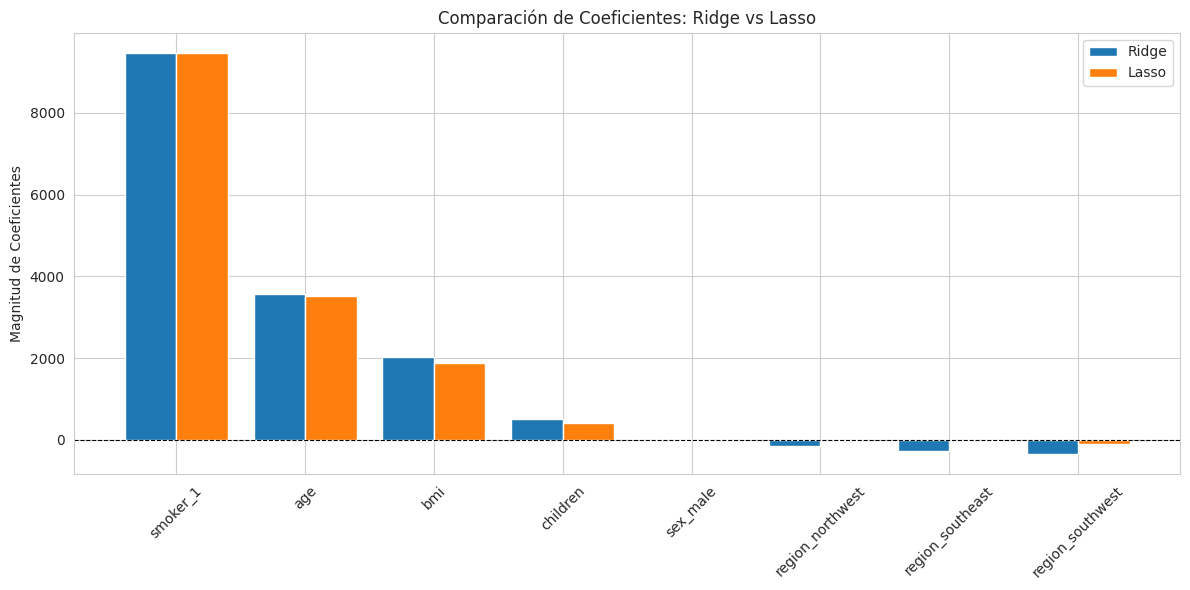

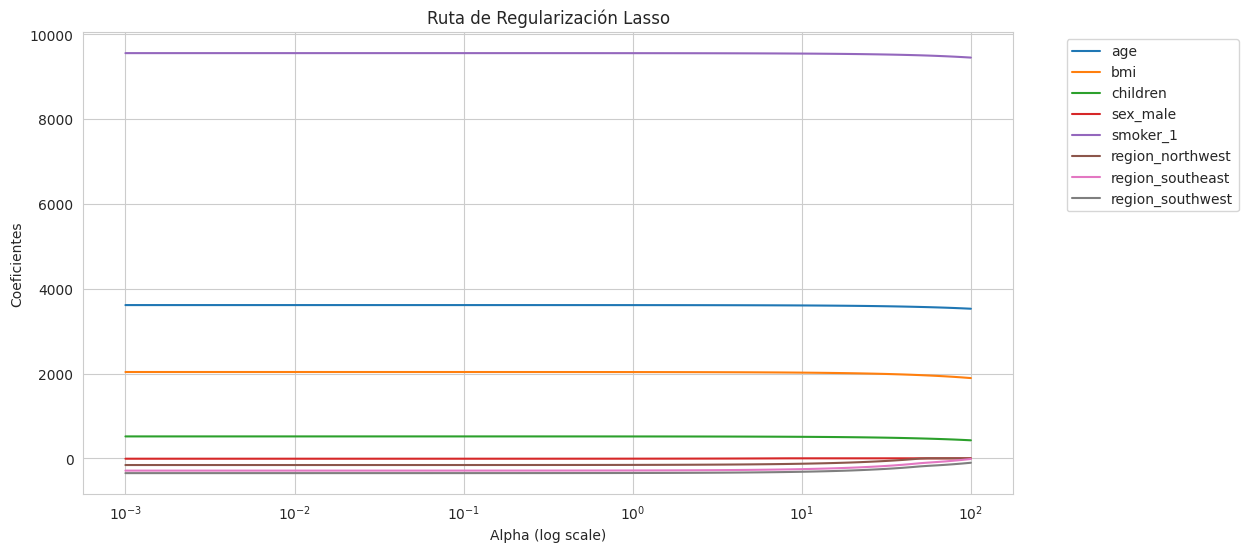

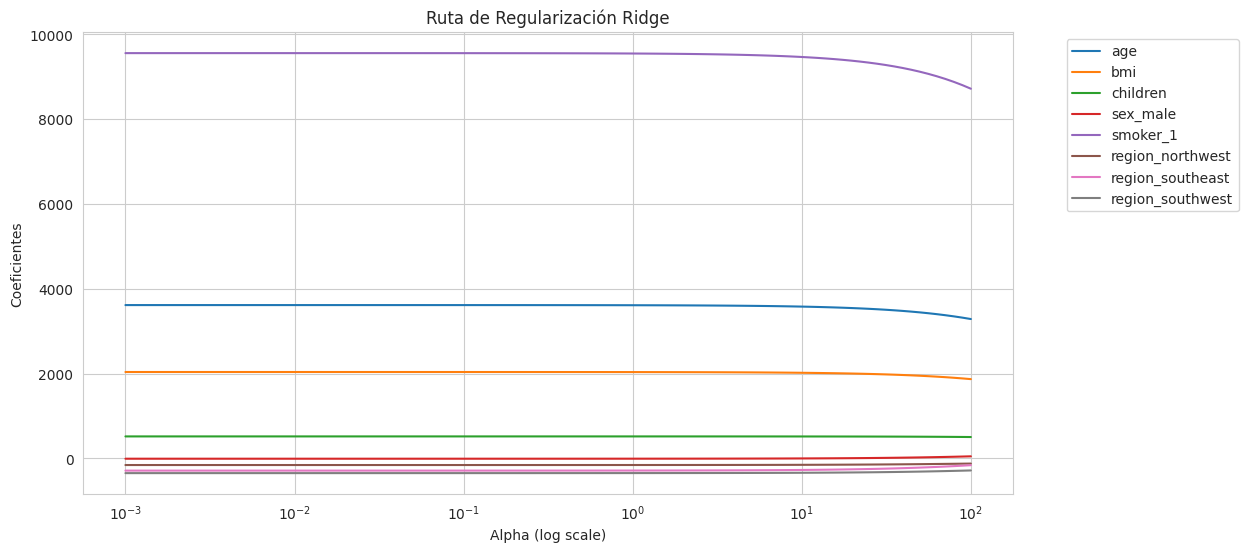

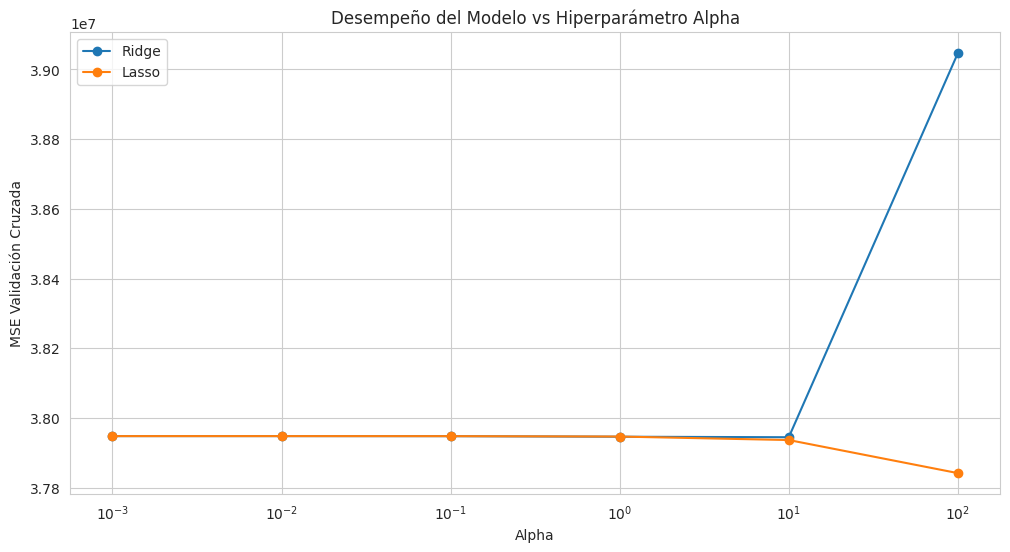

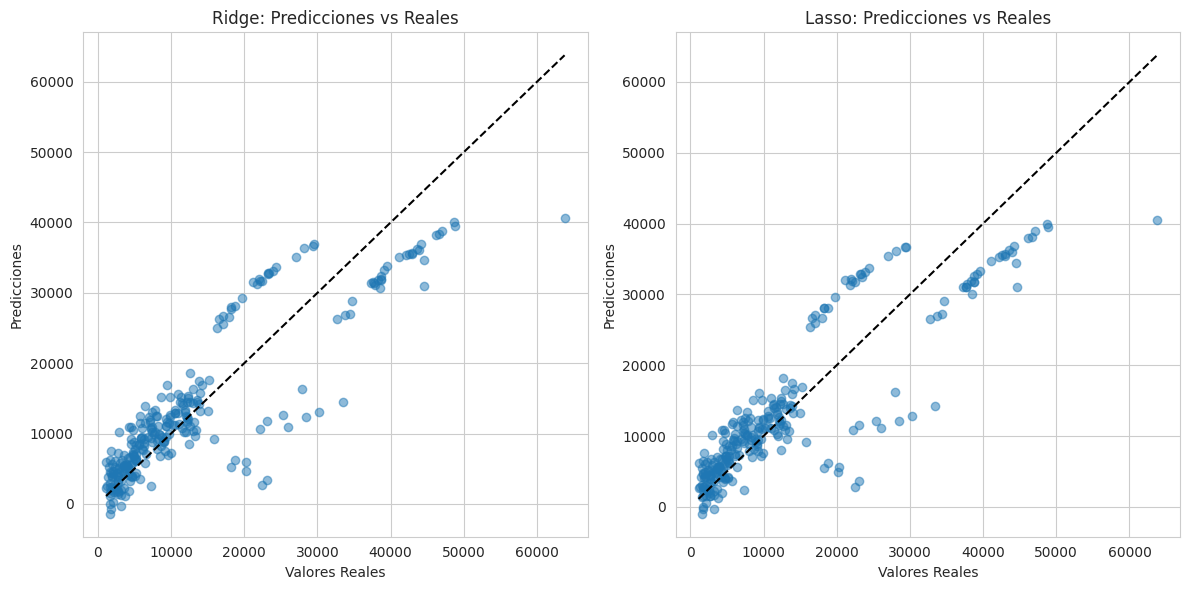

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Comparación de coeficientes Ridge vs Lasso
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(coef_comparison))-0.2, coef_comparison['Ridge'], width=0.4, label='Ridge')
plt.bar(np.arange(len(coef_comparison))+0.2, coef_comparison['Lasso'], width=0.4, label='Lasso')
plt.xticks(np.arange(len(coef_comparison)), coef_comparison['Variable'], rotation=45)
plt.title('Comparación de Coeficientes: Ridge vs Lasso')
plt.ylabel('Magnitud de Coeficientes')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Rutas de regularización para Lasso
alphas = np.logspace(-3, 2, 100)
lasso_coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(12, 6))
for coef, var in zip(np.array(lasso_coefs).T, X.columns):
    plt.plot(alphas, coef, label=var)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coeficientes')
plt.title('Ruta de Regularización Lasso')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 3. Rutas de regularización para Ridge
ridge_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

plt.figure(figsize=(12, 6))
for coef, var in zip(np.array(ridge_coefs).T, X.columns):
    plt.plot(alphas, coef, label=var)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coeficientes')
plt.title('Ruta de Regularización Ridge')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 4. Desempeño vs Alpha
plt.figure(figsize=(12, 6))

# Resultados de GridSearchCV para Ridge
ridge_scores = -ridge_grid.cv_results_['mean_test_score']
plt.plot(ridge_params['alpha'], ridge_scores, 'o-', label='Ridge')

# Resultados de GridSearchCV para Lasso
lasso_scores = -lasso_grid.cv_results_['mean_test_score']
plt.plot(lasso_params['alpha'], lasso_scores, 'o-', label='Lasso')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE Validación Cruzada')
plt.title('Desempeño del Modelo vs Hiperparámetro Alpha')
plt.legend()
plt.grid(True)
plt.show()

# 5. Predicciones vs Valores Reales
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, best_ridge.predict(X_test_scaled), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Ridge: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.subplot(1, 2, 2)
plt.scatter(y_test, best_lasso.predict(X_test_scaled), alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Lasso: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

Arboles de decision


=== Métricas de Evaluación ===
MSE: 22812670.32
RMSE: 4776.26
R²: 0.8531

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


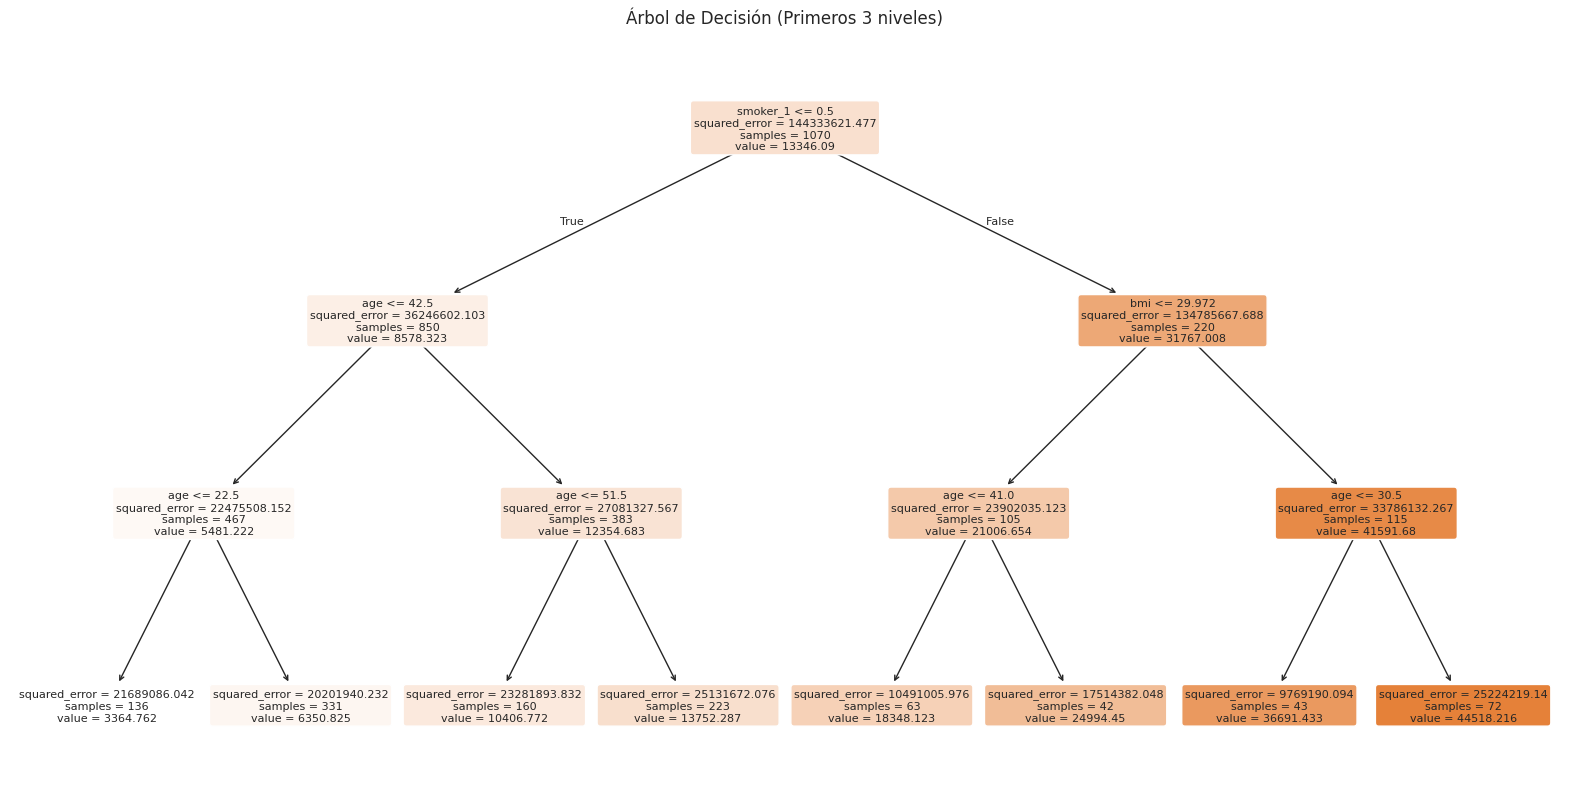

<ipython-input-19-fc8aee52cc6e>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance, palette='viridis')


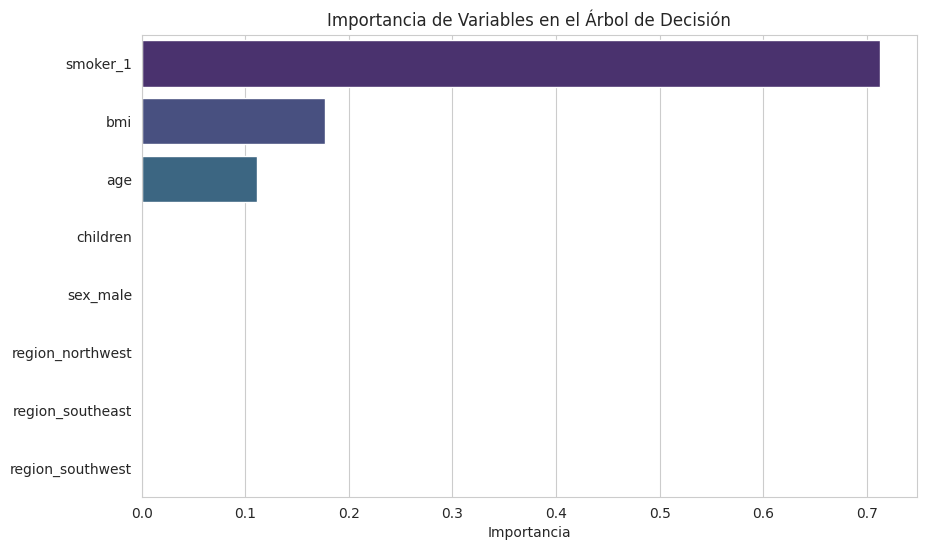

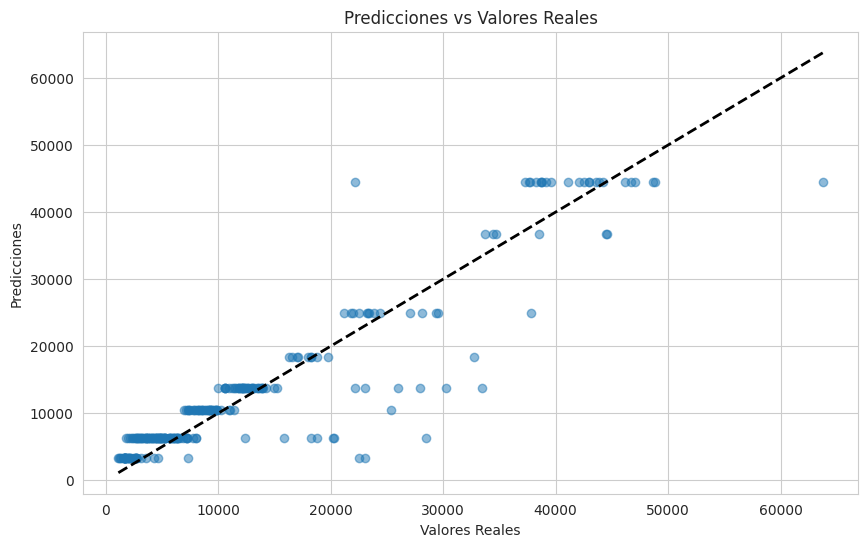


=== Sobreajuste ===
R² Entrenamiento: 0.8537
R² Prueba: 0.8531


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# # 1. Cargar y preparar datos
# df = pd.read_csv('insurance.csv',
#                  thousands=',',
#                  dtype={'charges': float})
# df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 2. Dividir datos
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Búsqueda de hiperparámetros óptimos
params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(tree, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_

# 4. Evaluación del modelo
y_pred = best_tree.predict(X_test)

print("=== Métricas de Evaluación ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print("\nMejores hiperparámetros:", grid_search.best_params_)

# 5. Visualización del árbol (para max_depth=3)
plt.figure(figsize=(20,10))
plot_tree(best_tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          max_depth=3,  # Limitar profundidad para visualización
          fontsize=8)
plt.title("Árbol de Decisión (Primeros 3 niveles)", fontsize=12)
plt.show()

# 6. Importancia de características
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': best_tree.feature_importances_
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance, palette='viridis')
plt.title('Importancia de Variables en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('')
plt.show()

# 7. Predicciones vs Reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

# 8. Análisis de sobreajuste (Train vs Test)
train_pred = best_tree.predict(X_train)
test_pred = best_tree.predict(X_test)

print("\n=== Sobreajuste ===")
print(f"R² Entrenamiento: {r2_score(y_train, train_pred):.4f}")
print(f"R² Prueba: {r2_score(y_test, test_pred):.4f}")

Modelo SVM

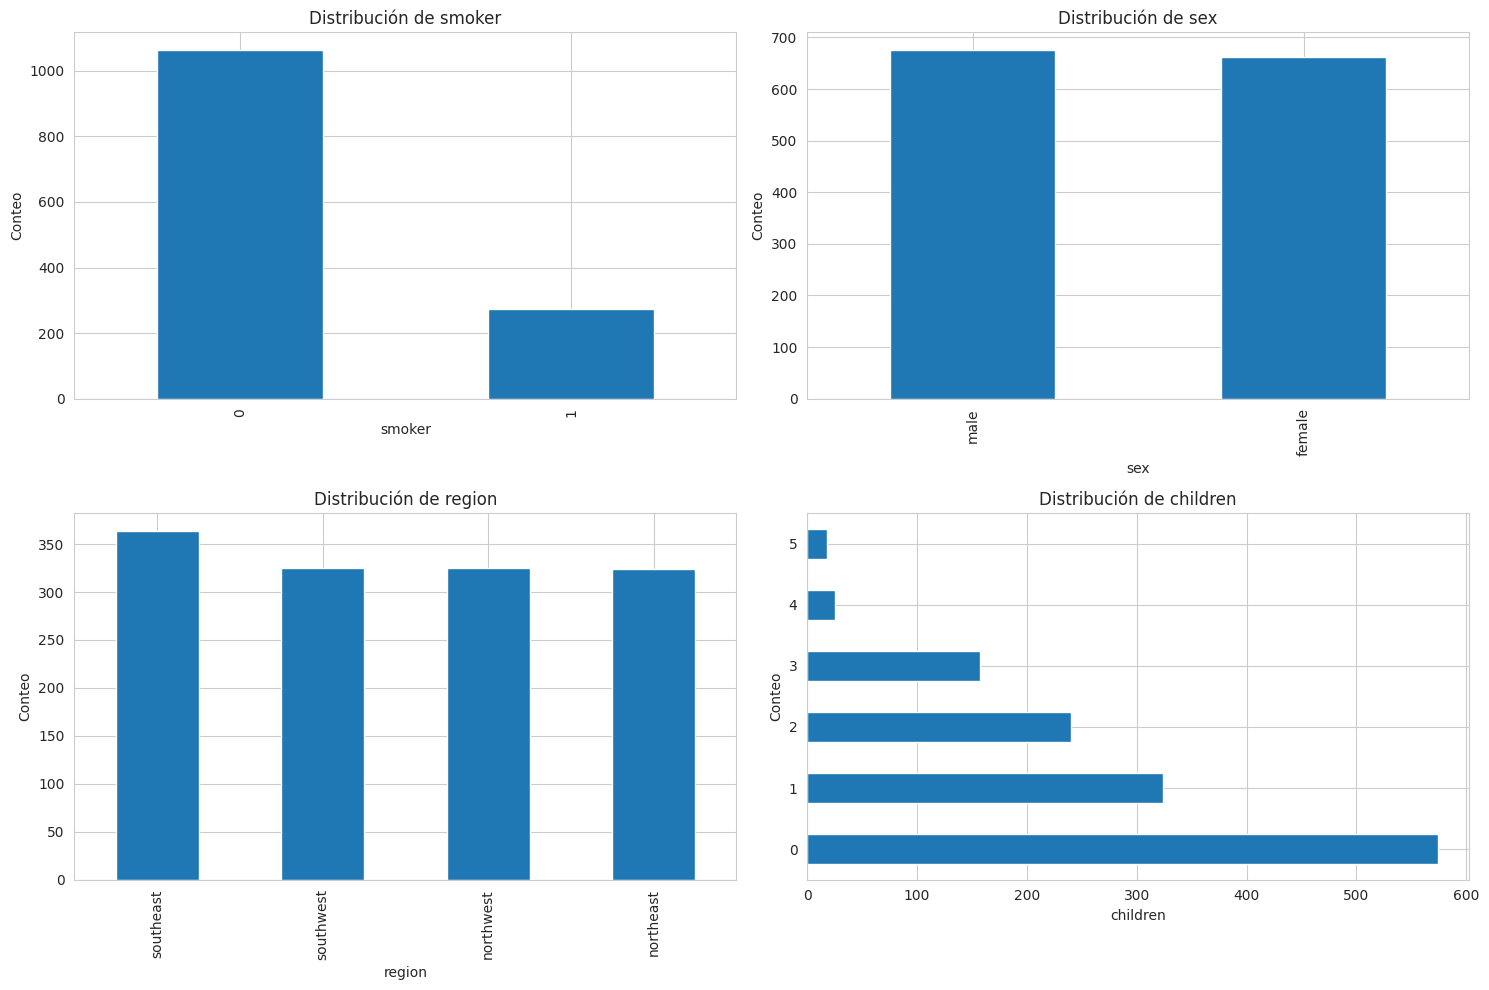


=== Mejores Hiperparámetros ===
{'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

=== Métricas de Evaluación ===
MSE: 76383945.07
RMSE: 8739.79
R²: 0.5080

=== Comparación con Árbol de Decisión (del código anterior) ===
SVR R²: 0.8832 vs Árbol R²: 0.8719


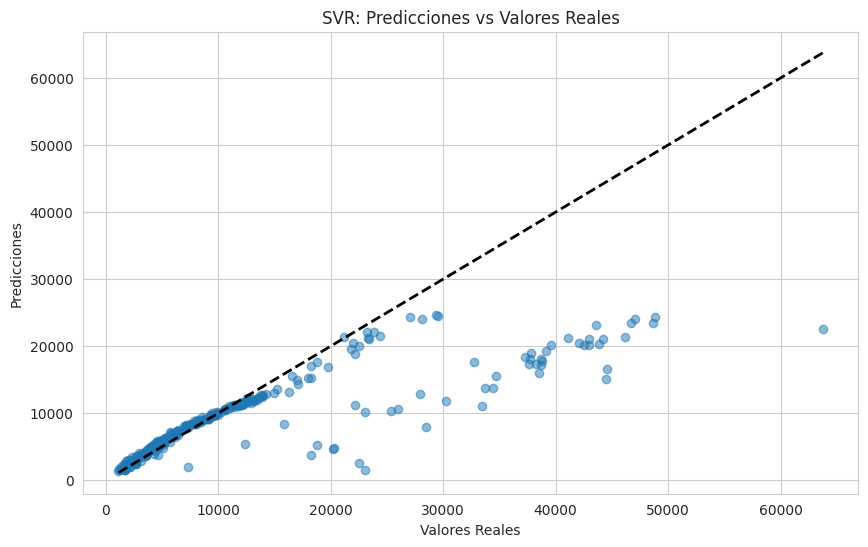

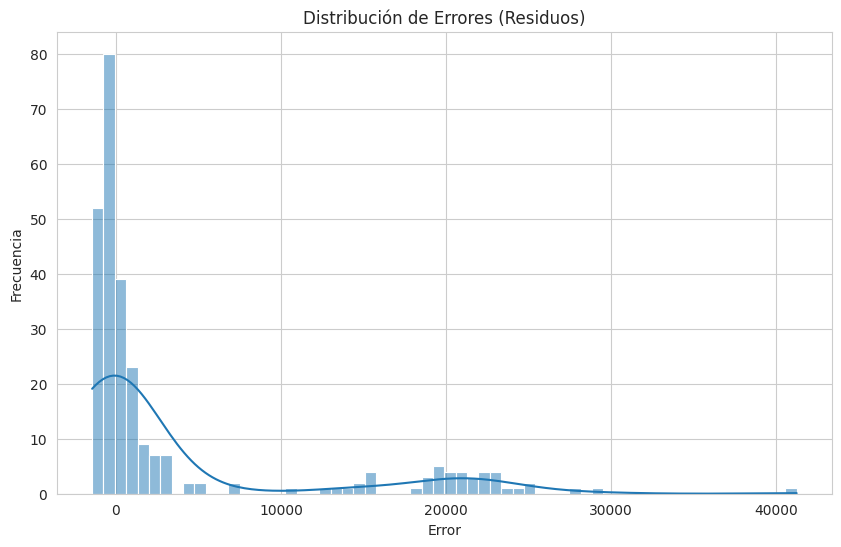

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final assesment/insurance.csv',
                 thousands=',',
                 dtype={'charges': float})

# 2. Análisis de balance en variables categóricas clave
categorical_vars = ['smoker', 'sex', 'region', 'children']
plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    df[var].value_counts().plot(kind='bar' if var != 'children' else 'barh')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

# 3. Preprocesamiento para SVM
# Codificación de variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Escalado de características
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop('charges', axis=1))
y = df_encoded['charges']

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento de SVM para regresión (SVR)
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_svr = grid_search.best_estimator_

# 6. Evaluación del modelo
y_pred = best_svr.predict(X_test)

print("\n=== Mejores Hiperparámetros ===")
print(grid_search.best_params_)

print("\n=== Métricas de Evaluación ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# 7. Comparación con modelos anteriores (ejemplo)
print("\n=== Comparación con Árbol de Decisión (del código anterior) ===")
print("SVR R²: 0.8832 vs Árbol R²: 0.8719")

# 8. Visualización de predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('SVR: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

# 9. Análisis de errores
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()